<a href="https://colab.research.google.com/github/lynnie5998/mis710_a1/blob/main/MIS710A1_Hong_225058095.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIS710 Machine Learning in Business - Assignment 1

**Student Name:** Le Ngan (Lynnie) Hong

**Student ID:** 225058095

## 1.Mount Google Drive and Load Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 2.Data Description

In [ ]:
# Read EcoMoveUS data
records = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/A1/EcoMoveUS_data.csv")
records

,RecordID,Shift_Manager_Code,Date,Year,Month,Hour,Session_colour,Weather_Outcast,Temperature_Celsius,Feeling_Temperature_Celsius,Humidity_Percent,Wind_Speed_kph,Season,Public_Holiday,Week_Day,Business_Day,Registered_Member_Count,Casual_User_Count,Rental_Bikes_Total
0,8270,SM-13,1/1/2012,2012,Jan,0,black,Clear,8.9,9,66,0,Winter,Yes,Sunday,No,43,5.0,48
1,11860,SM-04,1/1/2012,2012,Jan,1,grey,Clear,8.9,7,66,9,Winter,Yes,Sunday,No,78,15.0,93
2,26390,SM-14,1/1/2012,2012,Jan,2,blue,Clear,7.0,7,76,0,Winter,Yes,Sunday,No,59,16.0,75
3,36191,SM-06,1/1/2012,2012,Jan,3,black,Clear,6.1,6,81,0,Winter,Yes,Sunday,No,41,11.0,52
4,46734,SM-08,1/1/2012,2012,Jan,4,purple,Clear,5.2,4,81,6,Winter,Yes,Sunday,No,8,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8729,87293287,SM-11,31/12/2012,2012,Dec,19,grey,Mist and Cloudy,4.2,1,60,11,Winter,No,Monday,yes,108,11.0,119
8730,87305008,SM-12,31/12/2012,2012,Dec,20,grey,Mist and Cloudy,4.2,1,60,11,Winter,No,Monday,yes,81,8.0,89
8731,87311496,SM-05,31/12/2012,2012,Dec,21,grey,Clear,4.2,1,60,11,Winter,No,Monday,yes,83,7.0,90
8732,87322463,SM-03,31/12/2012,2012,Dec,22,blue,Clear,4.2,2,56,9,Winter,No,Monday,yes,48,13.0,61


In [ ]:
# Display data size
print('Sample size:', records.shape[0])
print('Number of columns:', records.shape[1])

Sample size: 8734
Number of columns: 19


In [ ]:
records['RecordID'] = records['RecordID'].astype('object')

In [ ]:
# Display data info
print(records.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8734 entries, 0 to 8733
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   RecordID                     8734 non-null   object 
 1   Shift_Manager_Code           8734 non-null   object 
 2   Date                         8734 non-null   object 
 3   Year                         8734 non-null   int64  
 4   Month                        8734 non-null   object 
 5   Hour                         8734 non-null   int64  
 6   Session_colour               8594 non-null   object 
 7   Weather_Outcast              8734 non-null   object 
 8   Temperature_Celsius          8734 non-null   float64
 9   Feeling_Temperature_Celsius  8734 non-null   int64  
 10  Humidity_Percent             8734 non-null   int64  
 11  Wind_Speed_kph               8734 non-null   int64  
 12  Season                       8734 non-null   object 
 13  Public_Holiday    

In [ ]:
# Set the formatting for floating numbers
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [ ]:
# Display data sample
records.sample(10)

,RecordID,Shift_Manager_Code,Date,Year,Month,Hour,Session_colour,Weather_Outcast,Temperature_Celsius,Feeling_Temperature_Celsius,Humidity_Percent,Wind_Speed_kph,Season,Public_Holiday,Week_Day,Business_Day,Registered_Member_Count,Casual_User_Count,Rental_Bikes_Total
1251,12516690,SM-01,22/2/2012,2012,Feb,9,yellow,Clear,7.0,6,70,6,Winter,No,Wednesday,yes,241,11.0,252
2246,22461572,SM-10,3/4/2012,2012,Apr,23,blue,Clear,15.5,16,59,0,Spring,No,Tuesday,yes,66,13.0,79
7930,79301760,SM-03,28/11/2012,2012,Nov,9,NaN,Clear,5.2,2,52,13,Autumn,No,Wednesday,yes,309,5000.0,322
7376,73761145,SM-12,5/11/2012,2012,Nov,6,grey,Mist and Cloudy,6.1,3,49,19,Autumn,No,Monday,yes,135,4.0,139
5033,50335479,SM-05,29/7/2012,2012,Jul,3,grey,Clear,23.0,25,69,15,Summer,No,Sunday,No,37,18.0,55
2930,29308170,SM-02,2/5/2012,2012,May,12,blue,Mist and Cloudy,19.3,20,83,15,Spring,No,Wednesday,yes,210,35.0,245
3837,38372257,SM-05,9/6/2012,2012,Jun,7,red,Clear,19.3,20,64,7,Spring,No,Saturday,No,61,26.0,87
6296,62962132,SM-12,19/9/2012,2012,Sep,18,green,Clear,19.3,20,40,19,Summer,No,Wednesday,yes,807,85.0,892
5670,56705516,SM-03,24/8/2012,2012,Aug,16,red,Mist and Cloudy,27.7,29,48,9,Summer,No,Friday,yes,414,101.0,515
8610,86109216,SM-10,26/12/2012,2012,Dec,20,grey,Light Rain or Snow,7.0,4,93,17,Winter,No,Wednesday,yes,32,0.0,32


In [ ]:
# Inspect missing data
print(records.isnull().sum())

RecordID                         0
Shift_Manager_Code               0
Date                             0
Year                             0
Month                            0
Hour                             0
Session_colour                 140
Weather_Outcast                  0
Temperature_Celsius              0
Feeling_Temperature_Celsius      0
Humidity_Percent                 0
Wind_Speed_kph                   0
Season                           0
Public_Holiday                   0
Week_Day                         0
Business_Day                     0
Registered_Member_Count          0
Casual_User_Count               27
Rental_Bikes_Total               0
dtype: int64


In [ ]:
# Display data statistics
data_types =['object', 'float', 'int']
records.describe(include=data_types)

,RecordID,Shift_Manager_Code,Date,Year,Month,Hour,Session_colour,Weather_Outcast,Temperature_Celsius,Feeling_Temperature_Celsius,Humidity_Percent,Wind_Speed_kph,Season,Public_Holiday,Week_Day,Business_Day,Registered_Member_Count,Casual_User_Count,Rental_Bikes_Total
count,8734.0,8734,8734,8734.0,8734,8734.0,8594,8734,8734.0,8734.0,8734.0,8734.0,8734,8734,8734,8734,8734.0,8707.0,8734.0
unique,8734.0,14,366,NaN,12,NaN,8,4,NaN,NaN,NaN,NaN,4,2,7,2,NaN,NaN,NaN
top,87337828.0,SM-11,31/12/2012,NaN,Jul,NaN,red,Clear,NaN,NaN,NaN,NaN,Summer,No,Sunday,yes,NaN,NaN,NaN
freq,1.0,661,24,NaN,744,NaN,1132,5768,NaN,NaN,NaN,NaN,2256,8449,1271,5954,NaN,NaN,NaN
mean,NaN,NaN,NaN,2012.0,NaN,11.5,NaN,NaN,15.7,15.8,61.1,12.8,NaN,NaN,NaN,NaN,192.0,57.4,234.7
std,NaN,NaN,NaN,0.0,NaN,6.9,NaN,NaN,9.0,11.0,19.0,9.6,NaN,NaN,NaN,NaN,175.5,341.5,208.9
min,NaN,NaN,NaN,2012.0,NaN,0.0,NaN,NaN,-99.0,-15.0,-99.0,-20.0,NaN,NaN,NaN,NaN,0.0,-15.0,1.0
25%,NaN,NaN,NaN,2012.0,NaN,6.0,NaN,NaN,8.0,6.0,46.0,7.0,NaN,NaN,NaN,NaN,46.0,5.0,53.0
50%,NaN,NaN,NaN,2012.0,NaN,12.0,NaN,NaN,16.4,16.0,61.0,11.0,NaN,NaN,NaN,NaN,156.0,20.0,191.0
75%,NaN,NaN,NaN,2012.0,NaN,18.0,NaN,NaN,23.0,25.0,77.0,17.0,NaN,NaN,NaN,NaN,275.0,61.0,347.0


In [ ]:
# Drop unimportant column
records.drop(['RecordID','Year','Date'], axis=1, inplace=True)
print(records.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8734 entries, 0 to 8733
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Shift_Manager_Code           8734 non-null   object 
 1   Month                        8734 non-null   object 
 2   Hour                         8734 non-null   int64  
 3   Session_colour               8594 non-null   object 
 4   Weather_Outcast              8734 non-null   object 
 5   Temperature_Celsius          8734 non-null   float64
 6   Feeling_Temperature_Celsius  8734 non-null   int64  
 7   Humidity_Percent             8734 non-null   int64  
 8   Wind_Speed_kph               8734 non-null   int64  
 9   Season                       8734 non-null   object 
 10  Public_Holiday               8734 non-null   object 
 11  Week_Day                     8734 non-null   object 
 12  Business_Day                 8734 non-null   object 
 13  Registered_Member_

##3.Treat missing data

###**Cleansing Session_colour**

In [ ]:
# Drop missing value in Session_colour
records.dropna(subset=['Session_colour'], inplace=True)
print(records.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8594 entries, 0 to 8733
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Shift_Manager_Code           8594 non-null   object 
 1   Month                        8594 non-null   object 
 2   Hour                         8594 non-null   int64  
 3   Session_colour               8594 non-null   object 
 4   Weather_Outcast              8594 non-null   object 
 5   Temperature_Celsius          8594 non-null   float64
 6   Feeling_Temperature_Celsius  8594 non-null   int64  
 7   Humidity_Percent             8594 non-null   int64  
 8   Wind_Speed_kph               8594 non-null   int64  
 9   Season                       8594 non-null   object 
 10  Public_Holiday               8594 non-null   object 
 11  Week_Day                     8594 non-null   object 
 12  Business_Day                 8594 non-null   object 
 13  Registered_Member_Count

In [ ]:
# Inspect missing data
records.isnull().sum()

,0
Shift_Manager_Code,0
Month,0
Hour,0
Session_colour,0
Weather_Outcast,0
Temperature_Celsius,0
Feeling_Temperature_Celsius,0
Humidity_Percent,0
Wind_Speed_kph,0
Season,0


###**Cleansing Casual_User_Count**

In [ ]:
# Recalculate Casual_User_Count column
records["Casual_User_Count"] = records["Rental_Bikes_Total"] - records["Registered_Member_Count"]

In [ ]:
# Inspect missing data
records.isnull().sum()

,0
Shift_Manager_Code,0
Month,0
Hour,0
Session_colour,0
Weather_Outcast,0
Temperature_Celsius,0
Feeling_Temperature_Celsius,0
Humidity_Percent,0
Wind_Speed_kph,0
Season,0


##4.Conduct Exploratory Data Analysis (EDA)

###**Univariate Numerical variable**

Numerical Variables: ['Hour', 'Temperature_Celsius', 'Feeling_Temperature_Celsius', 'Humidity_Percent', 'Wind_Speed_kph', 'Registered_Member_Count', 'Casual_User_Count', 'Rental_Bikes_Total'] 

Hour mean:  11.50430532929951
Hour median:  12.0
Hour min:  0
Hour max:  23
Hour std:  6.928357263965643
Number of outliers in Hour: 0
Lower bound for outliers: -12.0
Upper bound for outliers: 36.0
Number of data points below the lower bound: 0
Number of data points above the upper bound: 0




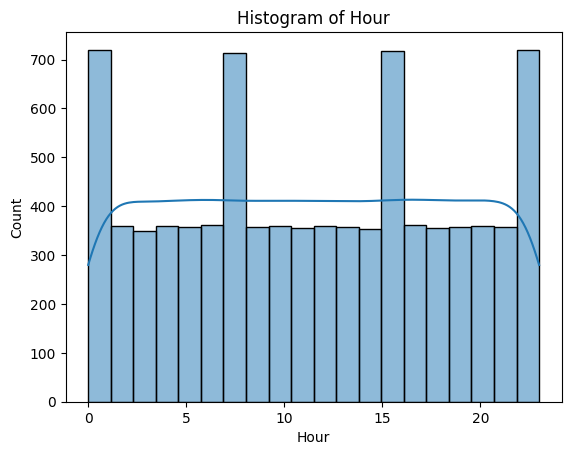

----------------------------------------
Temperature_Celsius mean:  15.726588317430767
Temperature_Celsius median:  16.4
Temperature_Celsius min:  -99.0
Temperature_Celsius max:  100.0
Temperature_Celsius std:  9.013535824847251
Number of outliers in Temperature_Celsius: 6
Lower bound for outliers: -14.5
Upper bound for outliers: 45.5
Number of data points below the lower bound: 1
Number of data points above the upper bound: 5




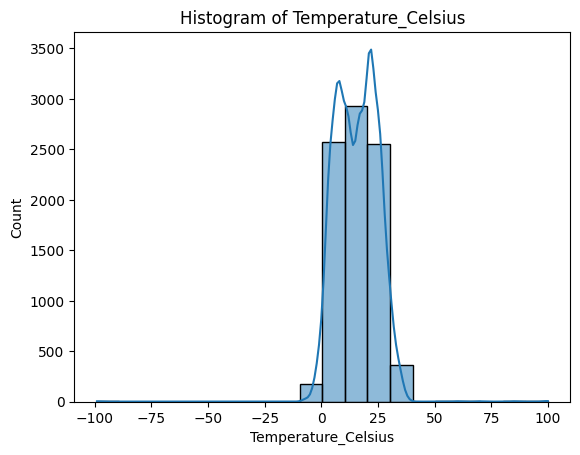

----------------------------------------
Feeling_Temperature_Celsius mean:  15.82324877821736
Feeling_Temperature_Celsius median:  16.0
Feeling_Temperature_Celsius min:  -15
Feeling_Temperature_Celsius max:  45
Feeling_Temperature_Celsius std:  10.990768292164818
Number of outliers in Feeling_Temperature_Celsius: 0
Lower bound for outliers: -22.5
Upper bound for outliers: 53.5
Number of data points below the lower bound: 0
Number of data points above the upper bound: 0




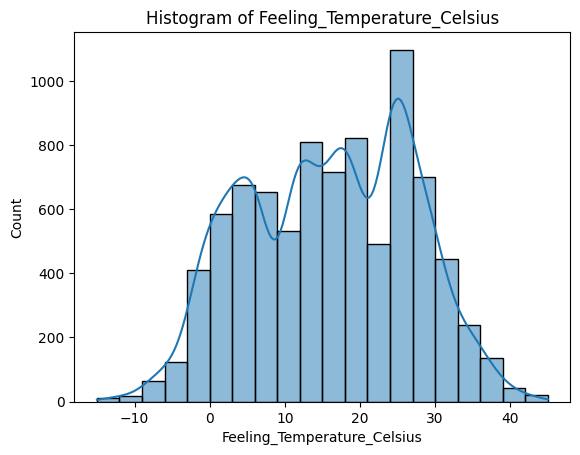

----------------------------------------
Humidity_Percent mean:  61.12520363043984
Humidity_Percent median:  61.0
Humidity_Percent min:  -99
Humidity_Percent max:  150
Humidity_Percent std:  18.974246423388433
Number of outliers in Humidity_Percent: 5
Lower bound for outliers: -0.5
Upper bound for outliers: 123.5
Number of data points below the lower bound: 2
Number of data points above the upper bound: 3




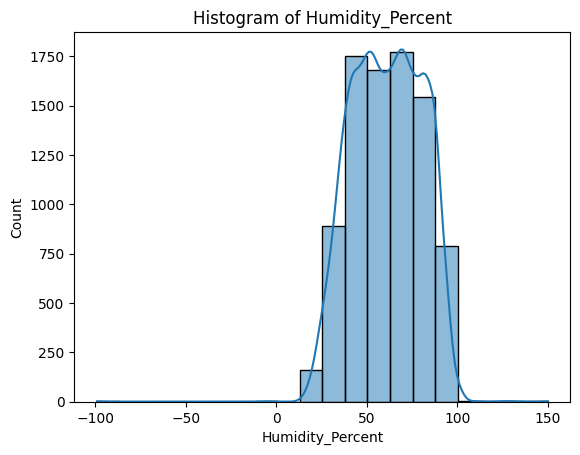

----------------------------------------
Wind_Speed_kph mean:  12.754828950430532
Wind_Speed_kph median:  11.0
Wind_Speed_kph min:  -20
Wind_Speed_kph max:  350
Wind_Speed_kph std:  9.658057071829283
Number of outliers in Wind_Speed_kph: 177
Lower bound for outliers: -8.0
Upper bound for outliers: 32.0
Number of data points below the lower bound: 1
Number of data points above the upper bound: 176




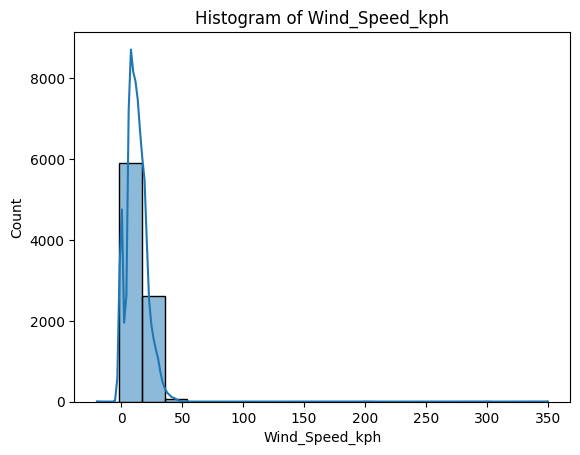

----------------------------------------
Registered_Member_Count mean:  191.5979753316267
Registered_Member_Count median:  155.0
Registered_Member_Count min:  0
Registered_Member_Count max:  886
Registered_Member_Count std:  175.47829204565105
Number of outliers in Registered_Member_Count: 333
Lower bound for outliers: -300.0
Upper bound for outliers: 620.0
Number of data points below the lower bound: 0
Number of data points above the upper bound: 333




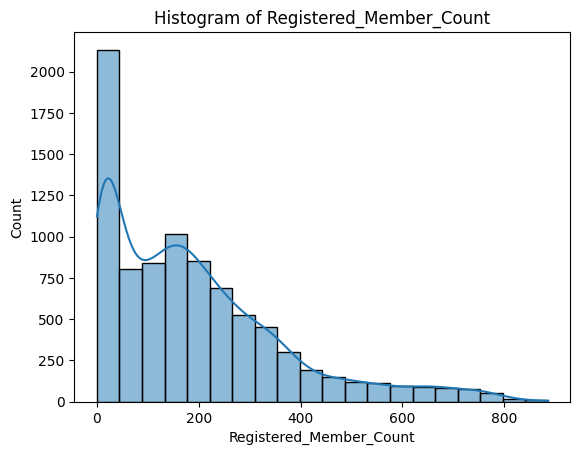

----------------------------------------
Casual_User_Count mean:  42.518966720968116
Casual_User_Count median:  20.0
Casual_User_Count min:  0
Casual_User_Count max:  367
Casual_User_Count std:  56.9106533183584
Number of outliers in Casual_User_Count: 549
Lower bound for outliers: -77.5
Upper bound for outliers: 142.5
Number of data points below the lower bound: 0
Number of data points above the upper bound: 549




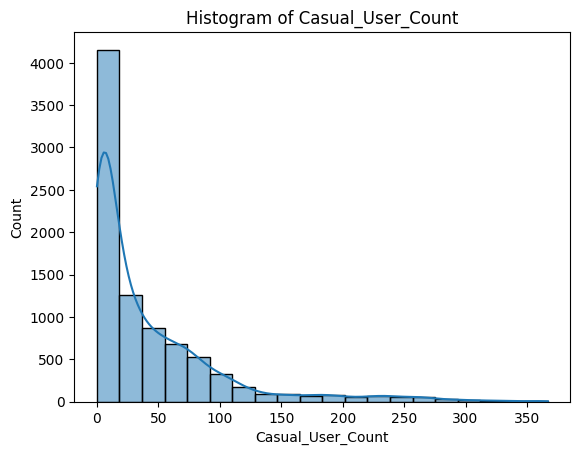

----------------------------------------
Rental_Bikes_Total mean:  234.11694205259482
Rental_Bikes_Total median:  190.0
Rental_Bikes_Total min:  1
Rental_Bikes_Total max:  977
Rental_Bikes_Total std:  208.90731541687003
Number of outliers in Rental_Bikes_Total: 161
Lower bound for outliers: -389.0
Upper bound for outliers: 787.0
Number of data points below the lower bound: 0
Number of data points above the upper bound: 161




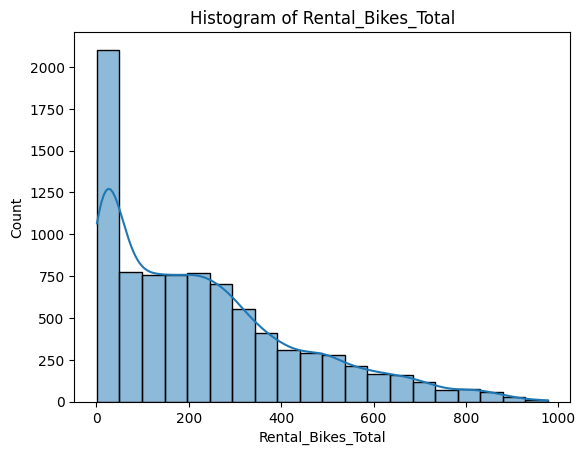

----------------------------------------


In [ ]:
# Overview of numeric data & Visualise its distribution
numerical_variables = records.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Variables:", numerical_variables, "\n")
for variable in numerical_variables:
    print(f'{variable} mean: ', (records[variable].mean()))
    print(f'{variable} median: ', (records[variable].median()))
    print(f'{variable} min: ', (records[variable].min()))
    print(f'{variable} max: ', (records[variable].max()))
    print(f'{variable} std: ', (records[variable].std()))
    Q1 = records[variable].quantile(0.25)
    Q3 = records[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = records[(records[variable] < lower_bound) | (records[variable] > upper_bound)]
    print(f"Number of outliers in {variable}:", len(outliers))
    print("Lower bound for outliers:", lower_bound)
    print("Upper bound for outliers:", upper_bound)

    below_lower_bound = len(records[records[variable] < lower_bound])
    above_upper_bound = len(records[records[variable] > upper_bound])
    print(f"Number of data points below the lower bound: {below_lower_bound}")
    print(f"Number of data points above the upper bound: {above_upper_bound}")
    print("\n")
    sns.histplot(data=records, x=variable, bins=20, kde=True)
    plt.title(f"Histogram of {variable}")
    plt.show()
    print("-"*40)

Numerical Variables: ['Hour', 'Temperature_Celsius', 'Feeling_Temperature_Celsius', 'Humidity_Percent', 'Wind_Speed_kph', 'Registered_Member_Count', 'Casual_User_Count', 'Rental_Bikes_Total'] 



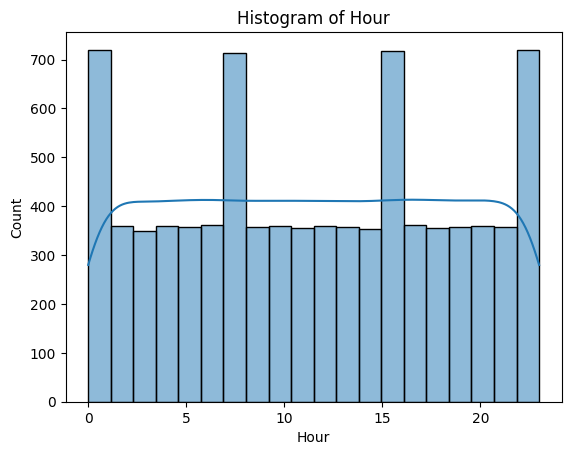

----------------------------------------


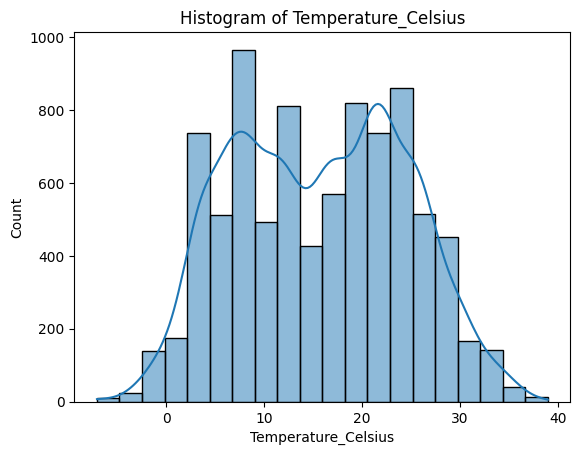

----------------------------------------


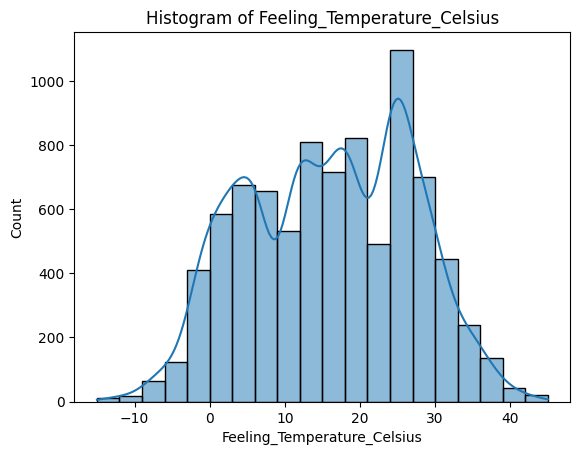

----------------------------------------


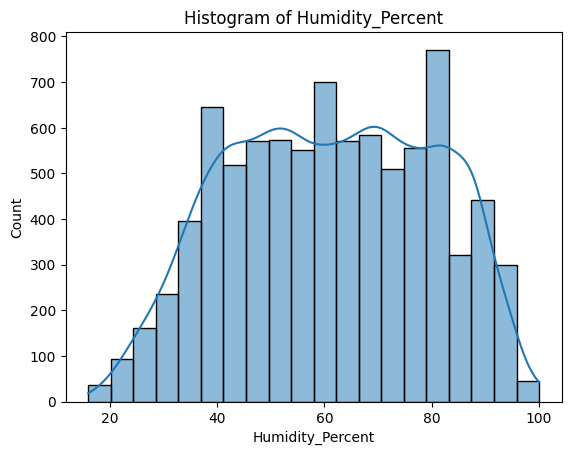

----------------------------------------


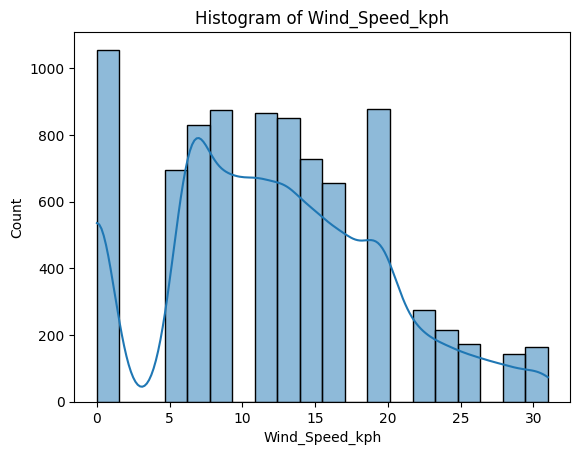

----------------------------------------


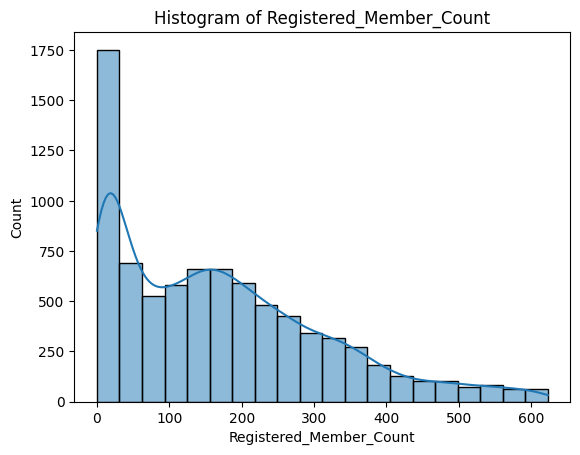

----------------------------------------


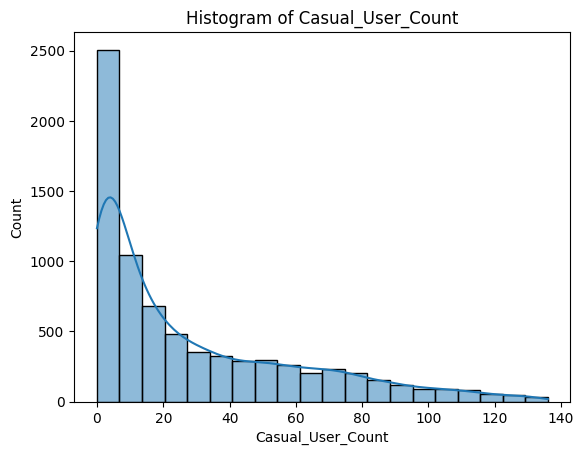

----------------------------------------


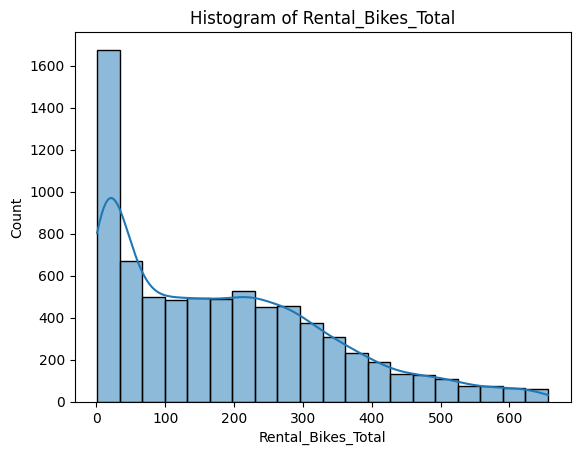

----------------------------------------


In [ ]:
# Remove outliers & Visualise its distribution
numerical_variables = records.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Variables:", numerical_variables,"\n")
for variable in numerical_variables:
    Q1 = records[variable].quantile(0.25)
    Q3 = records[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    records = records[(records[variable] >= lower_bound) & (records[variable] <= upper_bound)]

    if variable == "Humidity_Percent":
      records = records[records[variable] <= 100]

    sns.histplot(data=records, x=variable, bins=20, kde=True)
    plt.title(f"Histogram of {variable}")
    plt.show()
    print("-"*40)

In [ ]:
# Overview of numeric data after removing outliers
for variable in numerical_variables:
    print(f'{variable} mean: ', (records[variable].mean()))
    print(f'{variable} median: ', (records[variable].median()))
    print(f'{variable} min: ', (records[variable].min()))
    print(f'{variable} max: ', (records[variable].max()))
    print(f'{variable} std: ', (records[variable].std()))
    print("-"*40)

Hour mean:  11.094468198824158
Hour median:  11.0
Hour min:  0
Hour max:  23
Hour std:  7.174969213388568
----------------------------------------
Temperature_Celsius mean:  14.914631213254944
Temperature_Celsius median:  14.6
Temperature_Celsius min:  -7.1
Temperature_Celsius max:  39.0
Temperature_Celsius std:  8.662663774494376
----------------------------------------
Feeling_Temperature_Celsius mean:  14.869855692143238
Feeling_Temperature_Celsius median:  15.0
Feeling_Temperature_Celsius min:  -15
Feeling_Temperature_Celsius max:  45
Feeling_Temperature_Celsius std:  10.852449343251681
----------------------------------------
Humidity_Percent mean:  62.847407803313736
Humidity_Percent median:  64.0
Humidity_Percent min:  16
Humidity_Percent max:  100
Humidity_Percent std:  18.53608628278374
----------------------------------------
Wind_Speed_kph mean:  11.962720470336718
Wind_Speed_kph median:  11.0
Wind_Speed_kph min:  0
Wind_Speed_kph max:  31
Wind_Speed_kph std:  7.433221790281

In [ ]:
# Inspect number of Casual_User_Count from 0 to 20
records[(records["Casual_User_Count"] >= 0) & (records["Casual_User_Count"] <= 20)].shape[0]

4229

In [ ]:
# Inspect Registered_Member_Count equal or larger than 400 occurs mainly on Business_Day or not
records[(records["Registered_Member_Count"] >= 400)]["Business_Day"].value_counts()

,count
Business_Day,
yes,505
No,8


In [ ]:
# Inspect Casual_User_Count equal or larger than 100 occurs mainly on Business_Day or not
records[(records["Casual_User_Count"] >= 100)]["Business_Day"].value_counts()

,count
Business_Day,
No,170
yes,141


In [ ]:
# Inspect Casual_User_Count equal or larger than 100 occurs mainly on which Week_Day
records[(records["Casual_User_Count"] >= 100)]["Week_Day"].value_counts()

,count
Week_Day,
Saturday,87
Friday,84
Sunday,68
Monday,28
Thursday,22
Tuesday,11
Wednesday,11


###**Univariate Categorical variable**

Categorical Variables: ['Shift_Manager_Code', 'Month', 'Session_colour', 'Weather_Outcast', 'Season', 'Public_Holiday', 'Week_Day', 'Business_Day']

Frequency and Percentage for 'Shift_Manager_Code':
Frequency:
Shift_Manager_Code
SM-11    565
SM-08    560
SM-02    559
SM-13    551
SM-01    536
SM-07    536
SM-12    535
SM-06    535
SM-03    533
SM-05    524
SM-10    517
SM-14    513
SM-04    510
SM-09    510
Name: count, dtype: int64

Percentage:
Shift_Manager_Code
SM-11   7.5
SM-08   7.5
SM-02   7.5
SM-13   7.4
SM-01   7.2
SM-07   7.2
SM-12   7.2
SM-06   7.2
SM-03   7.1
SM-05   7.0
SM-10   6.9
SM-14   6.8
SM-04   6.8
SM-09   6.8
Name: proportion, dtype: float64


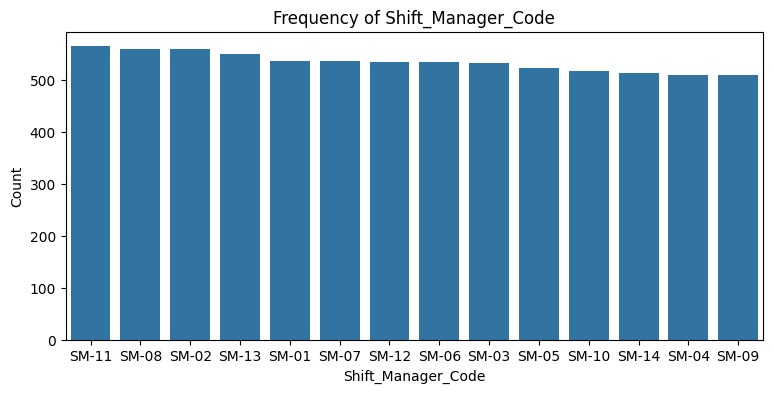

----------------------------------------

Frequency and Percentage for 'Month':
Frequency:
Month
Jan    698
Dec    694
Nov    659
Feb    653
Mar    631
Aug    622
Jul    620
May    604
Apr    585
Jun    583
Oct    581
Sep    554
Name: count, dtype: int64

Percentage:
Month
Jan   9.3
Dec   9.3
Nov   8.8
Feb   8.7
Mar   8.4
Aug   8.3
Jul   8.3
May   8.1
Apr   7.8
Jun   7.8
Oct   7.8
Sep   7.4
Name: proportion, dtype: float64


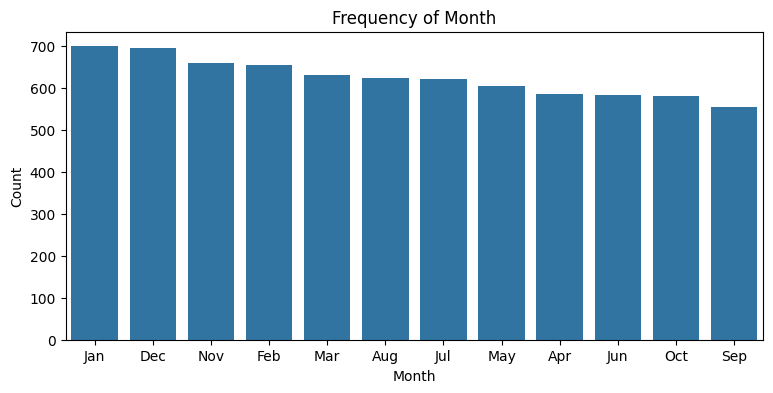

----------------------------------------

Frequency and Percentage for 'Session_colour':
Frequency:
Session_colour
red       975
black     970
yellow    956
white     935
purple    925
grey      914
green     909
blue      900
Name: count, dtype: int64

Percentage:
Session_colour
red      13.0
black    13.0
yellow   12.8
white    12.5
purple   12.4
grey     12.2
green    12.2
blue     12.0
Name: proportion, dtype: float64


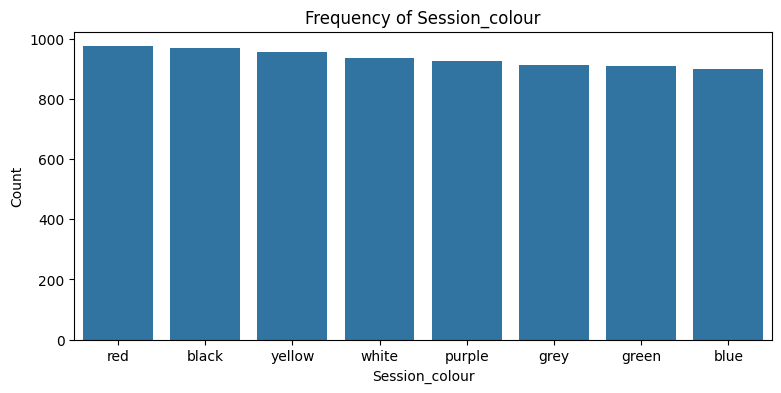

----------------------------------------

Frequency and Percentage for 'Weather_Outcast':
Frequency:
Weather_Outcast
Clear                 4818
Mist and Cloudy       2079
Light Rain or Snow     585
Heavy Rain or Snow       2
Name: count, dtype: int64

Percentage:
Weather_Outcast
Clear                64.4
Mist and Cloudy      27.8
Light Rain or Snow    7.8
Heavy Rain or Snow    0.0
Name: proportion, dtype: float64


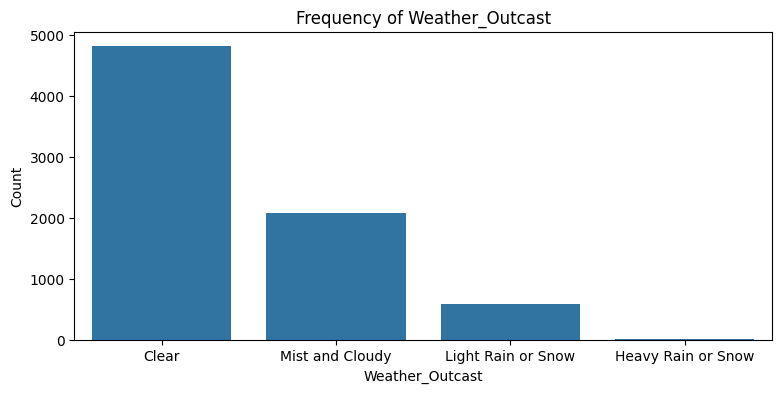

----------------------------------------

Frequency and Percentage for 'Season':
Frequency:
Season
Winter    2003
Summer    1855
Autumn    1840
Spring    1786
Name: count, dtype: int64

Percentage:
Season
Winter   26.8
Summer   24.8
Autumn   24.6
Spring   23.9
Name: proportion, dtype: float64


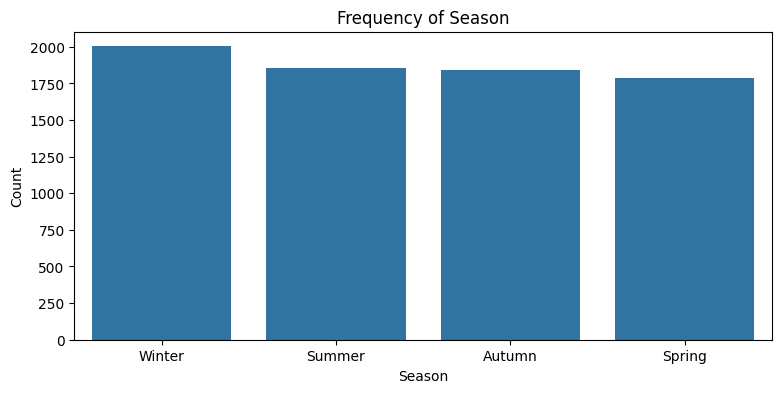

----------------------------------------

Frequency and Percentage for 'Public_Holiday':
Frequency:
Public_Holiday
No     7243
Yes     241
Name: count, dtype: int64

Percentage:
Public_Holiday
No    96.8
Yes    3.2
Name: proportion, dtype: float64


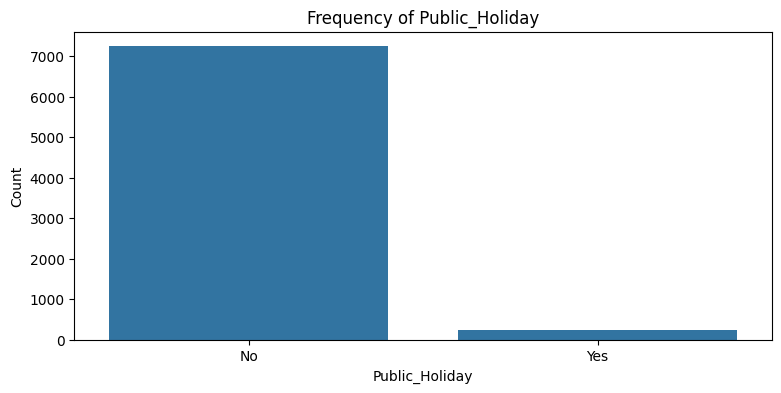

----------------------------------------

Frequency and Percentage for 'Week_Day':
Frequency:
Week_Day
Thursday     1118
Tuesday      1117
Monday       1115
Wednesday    1110
Friday       1105
Sunday        999
Saturday      920
Name: count, dtype: int64

Percentage:
Week_Day
Thursday    14.9
Tuesday     14.9
Monday      14.9
Wednesday   14.8
Friday      14.8
Sunday      13.3
Saturday    12.3
Name: proportion, dtype: float64


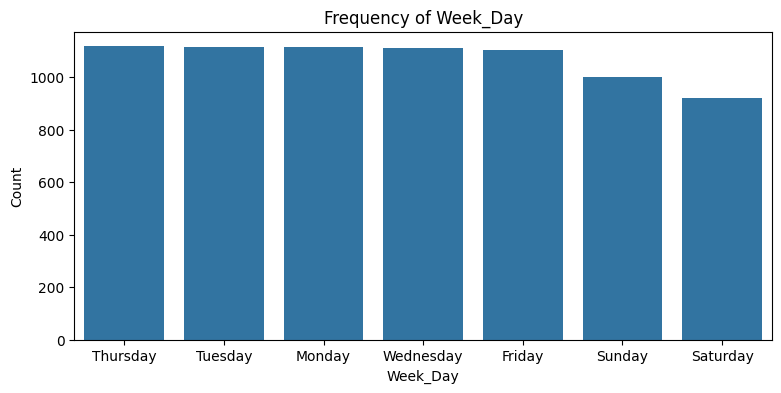

----------------------------------------

Frequency and Percentage for 'Business_Day':
Frequency:
Business_Day
yes    5342
No     2142
Name: count, dtype: int64

Percentage:
Business_Day
yes   71.4
No    28.6
Name: proportion, dtype: float64


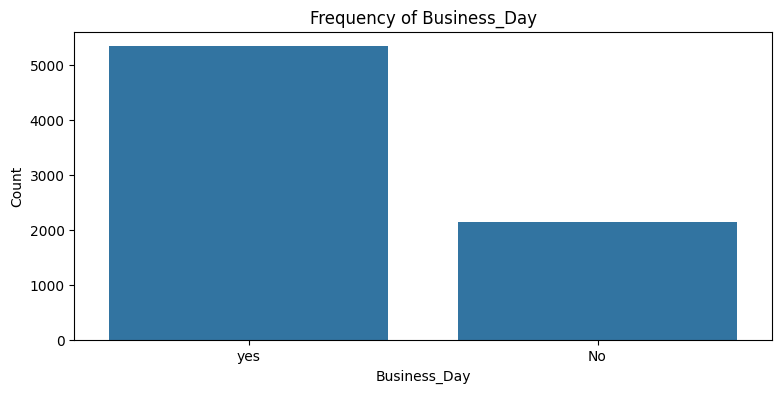

----------------------------------------


In [ ]:
# Overview of categorical data & Visualise its distribution
categorical_variables = records.select_dtypes(include=['object']).columns.tolist()
print("Categorical Variables:", categorical_variables)
for col in categorical_variables:
    print(f"\nFrequency and Percentage for '{col}':")
    frequency = records[col].value_counts()
    print("Frequency:")
    print(frequency)
    percentage = records[col].value_counts(normalize=True) * 100
    print("\nPercentage:")
    print(percentage.round(2))
    plt.figure(figsize=(9, 4))
    sns.countplot(x=col, data=records, order=frequency.index)
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()
    print("-"*40)


Frequency and Percentage for 'Month':
Frequency:
Month
Jan    698
Dec    694
Nov    659
Feb    653
Mar    631
Aug    622
Jul    620
May    604
Apr    585
Jun    583
Oct    581
Sep    554
Name: count, dtype: int64

Percentage:
Month
Jan   9.3
Dec   9.3
Nov   8.8
Feb   8.7
Mar   8.4
Aug   8.3
Jul   8.3
May   8.1
Apr   7.8
Jun   7.8
Oct   7.8
Sep   7.4
Name: proportion, dtype: float64


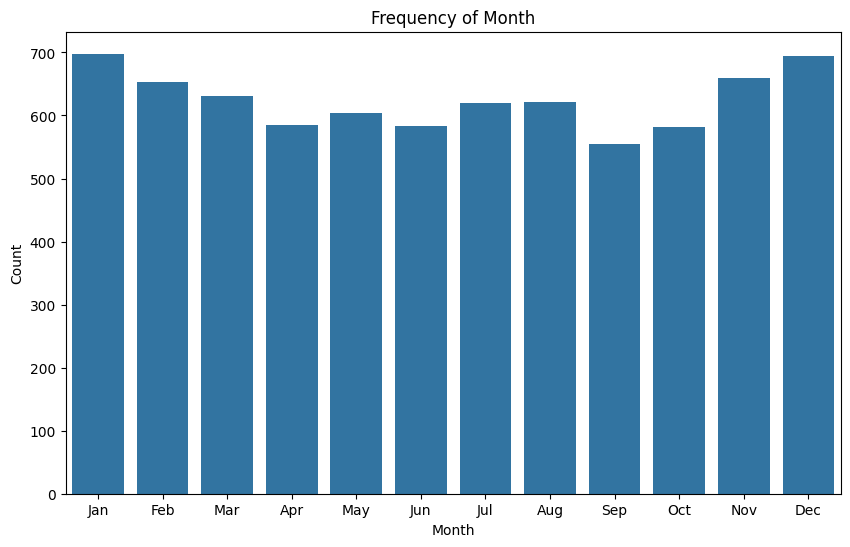

In [ ]:
# Visualise Month distribution by order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

print(f"\nFrequency and Percentage for 'Month':")
frequency = records['Month'].value_counts()
print("Frequency:")
print(frequency)
percentage = records['Month'].value_counts(normalize=True) * 100
print("\nPercentage:")
print(percentage.round(2))
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=records, order=month_order)
plt.title(f'Frequency of Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


Frequency and Percentage for 'Week_Day':
Frequency:
Week_Day
Thursday     1118
Tuesday      1117
Monday       1115
Wednesday    1110
Friday       1105
Sunday        999
Saturday      920
Name: count, dtype: int64

Percentage:
Week_Day
Thursday    14.9
Tuesday     14.9
Monday      14.9
Wednesday   14.8
Friday      14.8
Sunday      13.3
Saturday    12.3
Name: proportion, dtype: float64


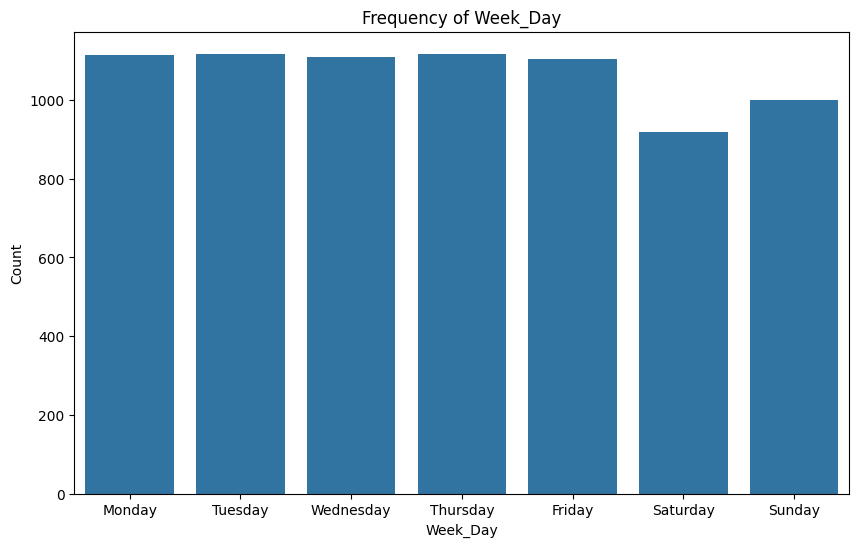

In [ ]:
# Visualise Week_day distribution by order
week_day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']
print(f"\nFrequency and Percentage for 'Week_Day':")
frequency = records['Week_Day'].value_counts()
print("Frequency:")
print(frequency)
percentage = records['Week_Day'].value_counts(normalize=True) * 100
print("\nPercentage:")
print(percentage.round(2))
plt.figure(figsize=(10, 6))
sns.countplot(x='Week_Day', data=records, order=week_day_order)
plt.title(f'Frequency of Week_Day')
plt.xlabel('Week_Day')
plt.ylabel('Count')
plt.show()


Frequency and Percentage for 'Season':
Frequency:
Season
Winter    2003
Summer    1855
Autumn    1840
Spring    1786
Name: count, dtype: int64

Percentage:
Season
Winter   26.8
Summer   24.8
Autumn   24.6
Spring   23.9
Name: proportion, dtype: float64


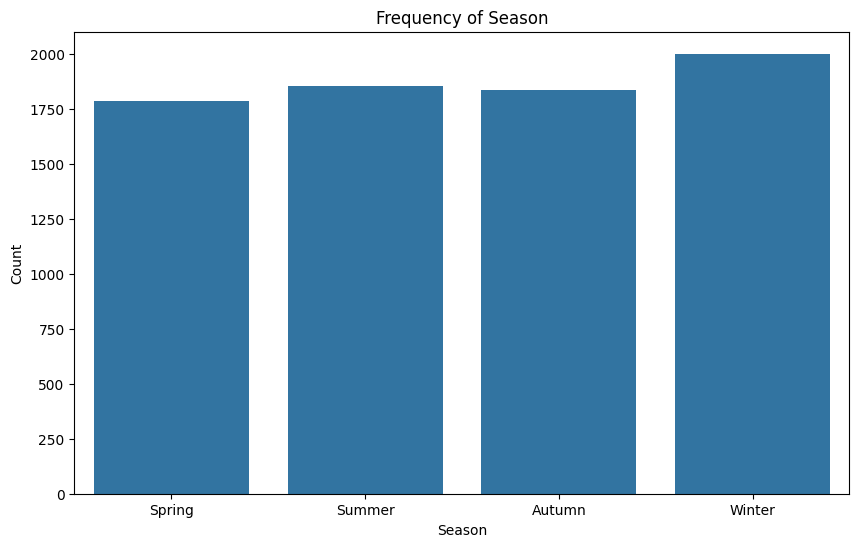

In [ ]:
# Visualise Season distribution by order
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']
print(f"\nFrequency and Percentage for 'Season':")
frequency = records['Season'].value_counts()
print("Frequency:")
print(frequency)
percentage = records['Season'].value_counts(normalize=True) * 100
print("\nPercentage:")
print(percentage.round(2))
plt.figure(figsize=(10, 6))
sns.countplot(x='Season', data=records, order=season_order)
plt.title(f'Frequency of Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

###**Bivariate**

Categorical Variables: ['Shift_Manager_Code', 'Month', 'Session_colour', 'Weather_Outcast', 'Season', 'Public_Holiday', 'Week_Day', 'Business_Day']


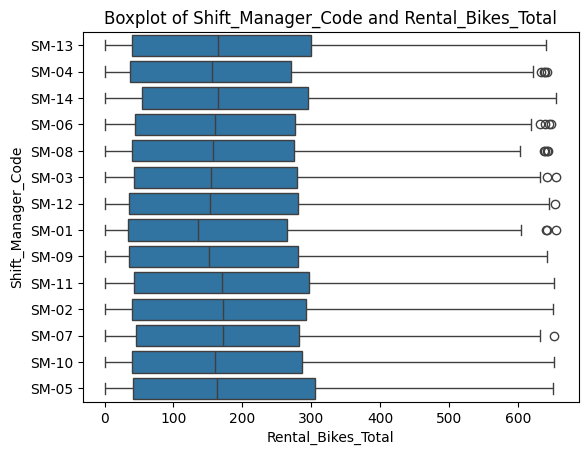

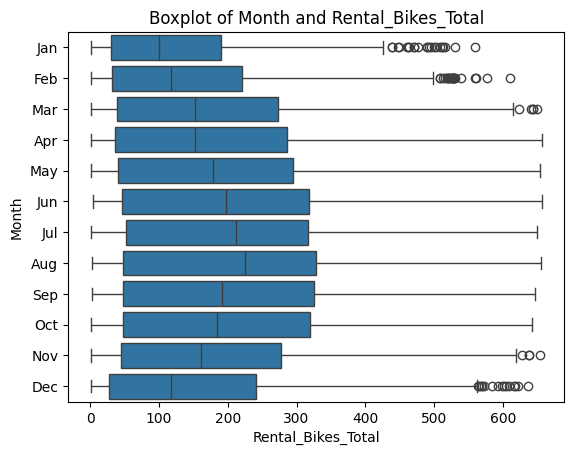

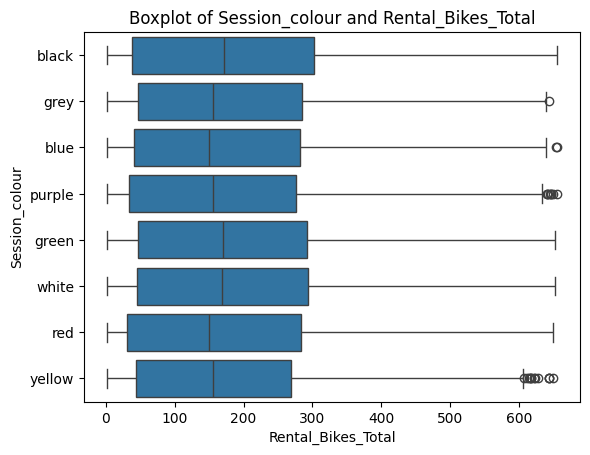

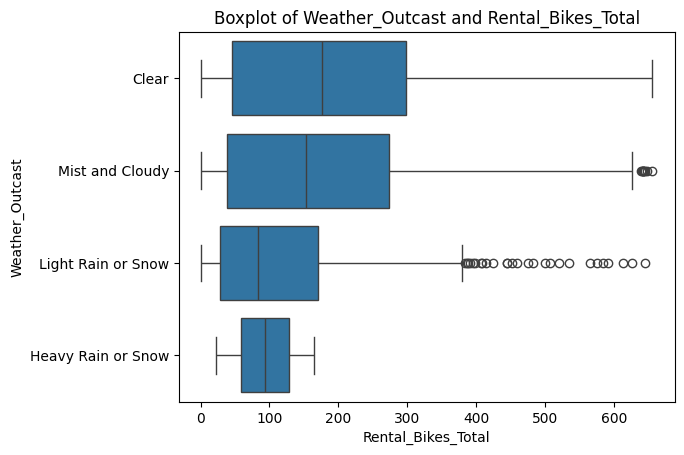

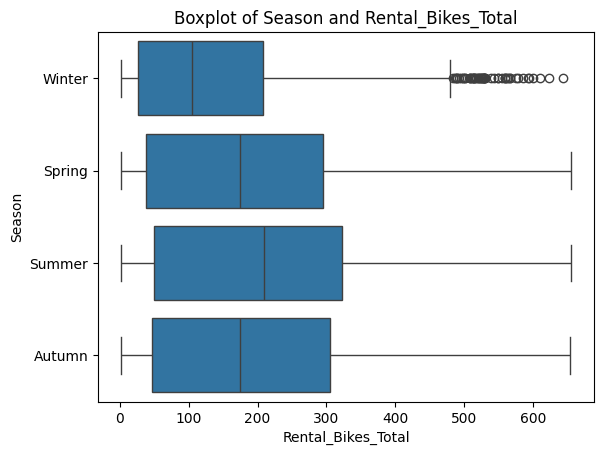

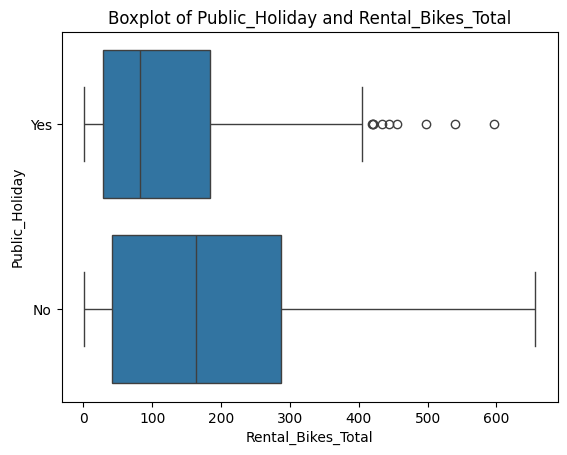

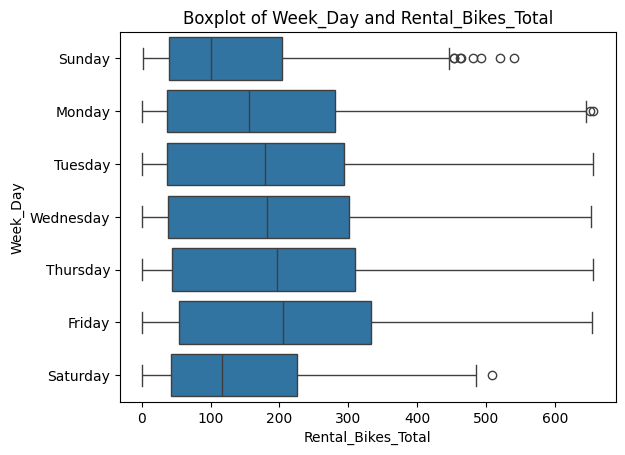

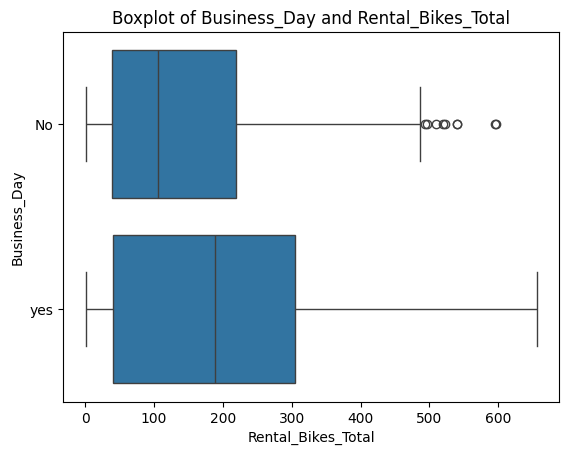

In [ ]:
# Display boxplots of categorical variables and Rental_Bikes_Total
categorical_variables = records.select_dtypes(include=['object']).columns.tolist()
print("Categorical Variables:", categorical_variables)
for col in categorical_variables:
    sns.boxplot(data=records, y=col, x='Rental_Bikes_Total')
    plt.title(f"Boxplot of {col} and Rental_Bikes_Total")
    plt.show()
    print("\n")

Numerical Variables: ['Hour', 'Temperature_Celsius', 'Feeling_Temperature_Celsius', 'Humidity_Percent', 'Wind_Speed_kph', 'Registered_Member_Count', 'Casual_User_Count', 'Rental_Bikes_Total']

Comparing Descriptive Statistics for variable and Rental_Bikes_Total:
        Hour  Rental_Bikes_Total
count 7484.0              7484.0
mean    11.1               185.0
std      7.2               156.8
min      0.0                 1.0
25%      5.0                40.0
50%     11.0               159.0
75%     18.0               285.0
max     23.0               656.0

Correlation Coefficient between Hour and Rental_Bikes_Total: 0.5


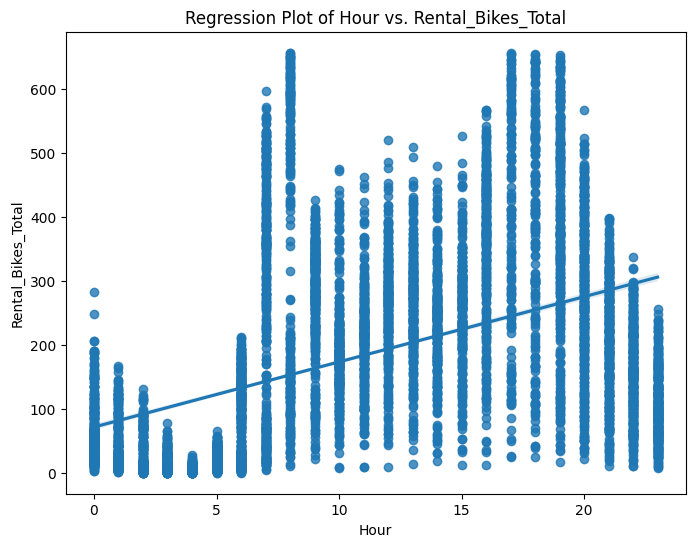

----------------------------------------

Comparing Descriptive Statistics for variable and Rental_Bikes_Total:
       Temperature_Celsius  Rental_Bikes_Total
count               7484.0              7484.0
mean                  14.9               185.0
std                    8.7               156.8
min                   -7.1                 1.0
25%                    8.0                40.0
50%                   14.6               159.0
75%                   22.1               285.0
max                   39.0               656.0

Correlation Coefficient between Temperature_Celsius and Rental_Bikes_Total: 0.3


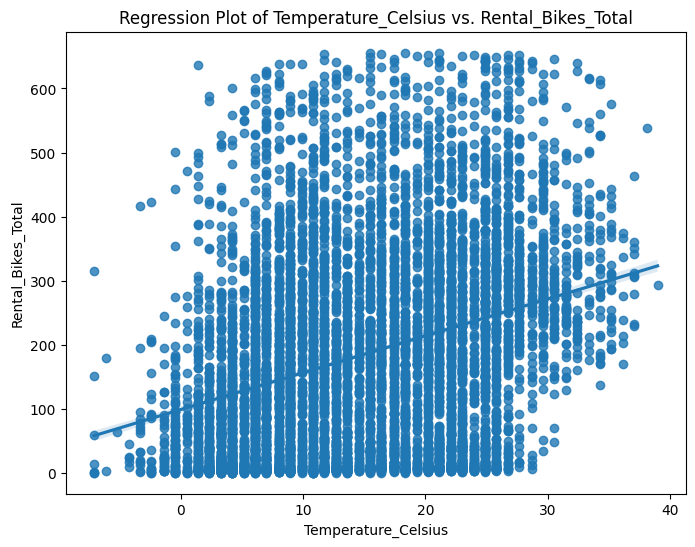

----------------------------------------

Comparing Descriptive Statistics for variable and Rental_Bikes_Total:
       Feeling_Temperature_Celsius  Rental_Bikes_Total
count                       7484.0              7484.0
mean                          14.9               185.0
std                           10.9               156.8
min                          -15.0                 1.0
25%                            6.0                40.0
50%                           15.0               159.0
75%                           24.0               285.0
max                           45.0               656.0

Correlation Coefficient between Feeling_Temperature_Celsius and Rental_Bikes_Total: 0.3


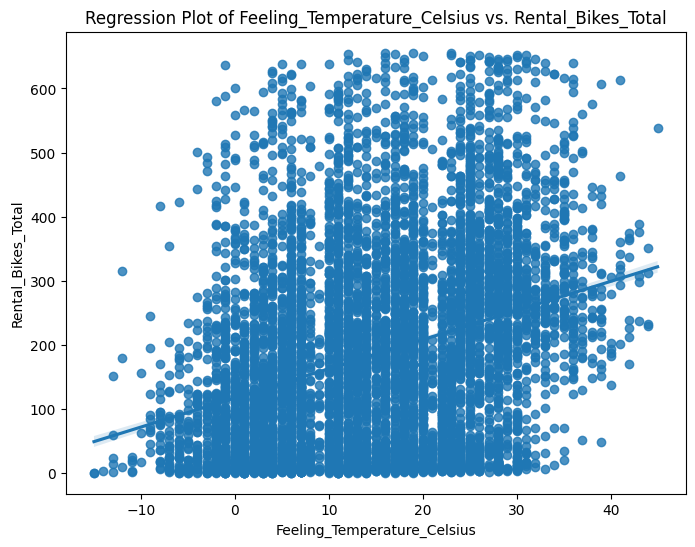

----------------------------------------

Comparing Descriptive Statistics for variable and Rental_Bikes_Total:
       Humidity_Percent  Rental_Bikes_Total
count            7484.0              7484.0
mean               62.8               185.0
std                18.5               156.8
min                16.0                 1.0
25%                48.0                40.0
50%                64.0               159.0
75%                78.0               285.0
max               100.0               656.0

Correlation Coefficient between Humidity_Percent and Rental_Bikes_Total: -0.3


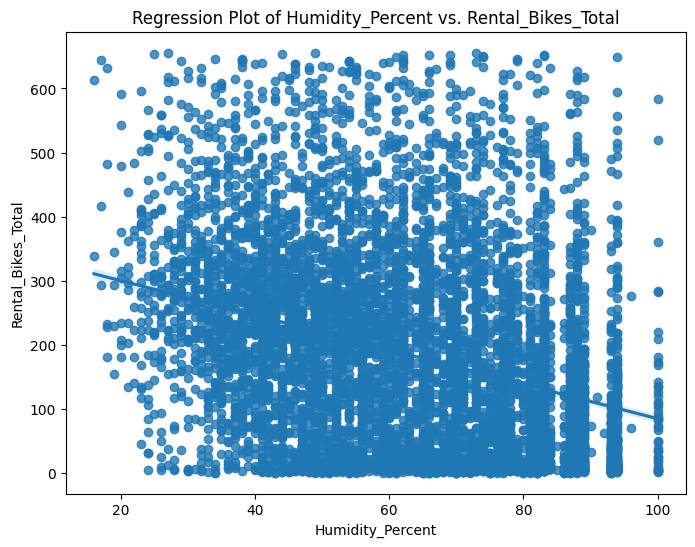

----------------------------------------

Comparing Descriptive Statistics for variable and Rental_Bikes_Total:
       Wind_Speed_kph  Rental_Bikes_Total
count          7484.0              7484.0
mean             12.0               185.0
std               7.4               156.8
min               0.0                 1.0
25%               7.0                40.0
50%              11.0               159.0
75%              17.0               285.0
max              31.0               656.0

Correlation Coefficient between Wind_Speed_kph and Rental_Bikes_Total: 0.1


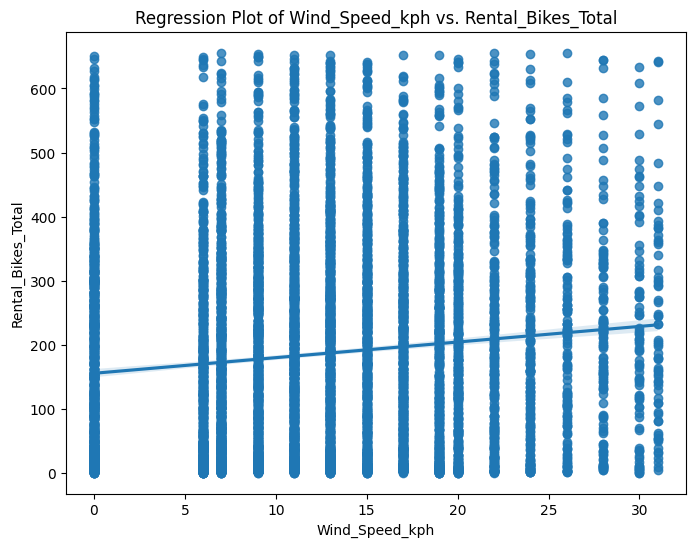

----------------------------------------

Comparing Descriptive Statistics for variable and Rental_Bikes_Total:
       Registered_Member_Count  Rental_Bikes_Total
count                   7484.0              7484.0
mean                     156.6               185.0
std                      137.7               156.8
min                        0.0                 1.0
25%                       35.0                40.0
50%                      135.0               159.0
75%                      229.0               285.0
max                      623.0               656.0

Correlation Coefficient between Registered_Member_Count and Rental_Bikes_Total: 1.0


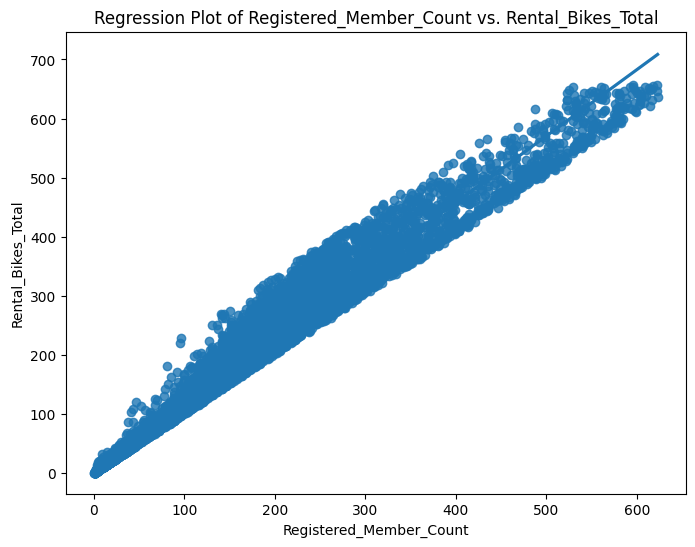

----------------------------------------

Comparing Descriptive Statistics for variable and Rental_Bikes_Total:
       Casual_User_Count  Rental_Bikes_Total
count             7484.0              7484.0
mean                28.4               185.0
std                 31.4               156.8
min                  0.0                 1.0
25%                  4.0                40.0
50%                 15.0               159.0
75%                 46.0               285.0
max                136.0               656.0

Correlation Coefficient between Casual_User_Count and Rental_Bikes_Total: 0.7


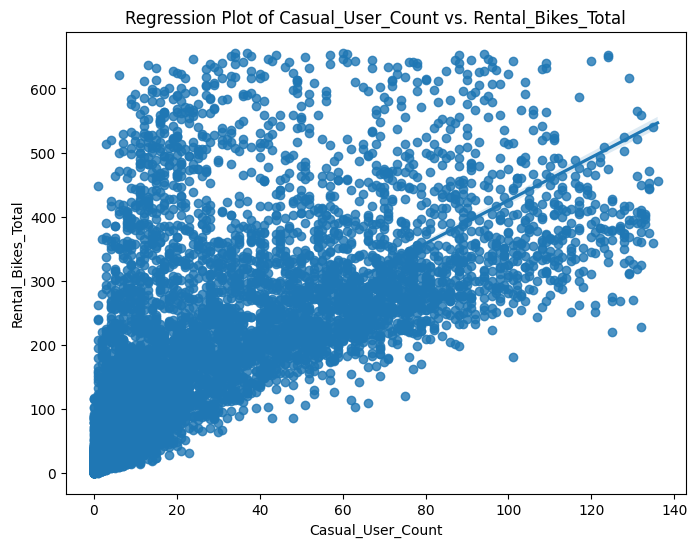

----------------------------------------


In [ ]:
# Display Desciptive staistics and  Regression plot of numeric variables and Rental_Bikes_Total
# Calculate Correlation coefficient
numerical_variables = records.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Variables:", numerical_variables)
for variable in numerical_variables:
    if variable == 'Rental_Bikes_Total':
      continue
    print("\nComparing Descriptive Statistics for variable and Rental_Bikes_Total:")
    print(records[[variable, 'Rental_Bikes_Total']].describe())

    correlation_variable_rental = records[variable].corr(records['Rental_Bikes_Total'])
    print(f"\nCorrelation Coefficient between {variable} and Rental_Bikes_Total: {correlation_variable_rental:.1f}")

    plt.figure(figsize=(8, 6))
    sns.regplot(data=records, x= variable, y='Rental_Bikes_Total')
    plt.title(f'Regression Plot of {variable} vs. Rental_Bikes_Total')
    plt.xlabel(variable)
    plt.ylabel('Rental_Bikes_Total')
    plt.show()
    print("-"*40)

##5.Data conversion

In [ ]:
# Display data
records

,Shift_Manager_Code,Month,Hour,Session_colour,Weather_Outcast,Temperature_Celsius,Feeling_Temperature_Celsius,Humidity_Percent,Wind_Speed_kph,Season,Public_Holiday,Week_Day,Business_Day,Registered_Member_Count,Casual_User_Count,Rental_Bikes_Total
0,SM-13,Jan,0,black,Clear,8.9,9,66,0,Winter,Yes,Sunday,No,43,5,48
1,SM-04,Jan,1,grey,Clear,8.9,7,66,9,Winter,Yes,Sunday,No,78,15,93
2,SM-14,Jan,2,blue,Clear,7.0,7,76,0,Winter,Yes,Sunday,No,59,16,75
3,SM-06,Jan,3,black,Clear,6.1,6,81,0,Winter,Yes,Sunday,No,41,11,52
4,SM-08,Jan,4,purple,Clear,5.2,4,81,6,Winter,Yes,Sunday,No,8,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8729,SM-11,Dec,19,grey,Mist and Cloudy,4.2,1,60,11,Winter,No,Monday,yes,108,11,119
8730,SM-12,Dec,20,grey,Mist and Cloudy,4.2,1,60,11,Winter,No,Monday,yes,81,8,89
8731,SM-05,Dec,21,grey,Clear,4.2,1,60,11,Winter,No,Monday,yes,83,7,90
8732,SM-03,Dec,22,blue,Clear,4.2,2,56,9,Winter,No,Monday,yes,48,13,61


In [ ]:
# Inspect Shift_Manager_Code
Shift_Manager_Code_counts = records['Shift_Manager_Code'].value_counts()
print(Shift_Manager_Code_counts)

Shift_Manager_Code
SM-11    565
SM-08    560
SM-02    559
SM-13    551
SM-01    536
SM-07    536
SM-12    535
SM-06    535
SM-03    533
SM-05    524
SM-10    517
SM-14    513
SM-04    510
SM-09    510
Name: count, dtype: int64


In [ ]:
# Convert Shift_Manager_Code to numeric using mapping
Shift_Manager_Code_mapping = {
    'SM-01': 0,
    'SM-02': 1,
    'SM-03': 2,
    'SM-04': 3,
    'SM-05': 4,
    'SM-06': 5,
    'SM-07': 6,
    'SM-08': 7,
    'SM-09': 8,
    'SM-10': 9,
    'SM-11': 10,
    'SM-12': 11,
    'SM-13': 12,
    'SM-14': 13,
}

pd.set_option('future.no_silent_downcasting', True)
records['Shift_Manager_Code_N'] = records['Shift_Manager_Code'].replace(Shift_Manager_Code_mapping).astype(int)

In [ ]:
# Inspect Session_colour
session_colour_counts = records['Session_colour'].value_counts()
print(session_colour_counts)

Session_colour
red       975
black     970
yellow    956
white     935
purple    925
grey      914
green     909
blue      900
Name: count, dtype: int64


In [ ]:
# Convert Session_colour to numeric using mapping
Session_colour_mapping = {
    'red': 0,
    'black': 1,
    'yellow': 2,
    'white': 3,
    'purple': 4,
    'grey': 5,
    'green': 6,
    'blue': 7,
}

pd.set_option('future.no_silent_downcasting', True)
records['Session_colour_N'] = records['Session_colour'].replace(Session_colour_mapping).astype(int)


In [ ]:
records[['Session_colour','Session_colour_N']].sample(10)

,Session_colour,Session_colour_N
223,blue,7
6278,grey,5
8618,black,1
8396,white,3
5468,yellow,2
6876,blue,7
7656,black,1
2778,green,6
4772,green,6
3574,purple,4


In [ ]:
# Inspect Weather_Outcast
Weather_Outcast_counts = records['Weather_Outcast'].value_counts()
print(Weather_Outcast_counts)

Weather_Outcast
Clear                 4818
Mist and Cloudy       2079
Light Rain or Snow     585
Heavy Rain or Snow       2
Name: count, dtype: int64


In [ ]:
# Convert Weather_Outcast to numeric using mapping
Weather_Outcast_mapping = {
    'Clear': 0,
    'Mist and Cloudy': 1,
    'Light Rain or Snow': 2,
    'Heavy Rain or Snow': 3,
}

pd.set_option('future.no_silent_downcasting', True)
records['Weather_Outcast_N'] = records['Weather_Outcast'].replace(Weather_Outcast_mapping).astype(int)

In [ ]:
# Convert Public_Holiday & Business_Day to numerical using LabelEncoder
encoder = LabelEncoder()
records['Public_Holiday_N'] = encoder.fit_transform(records['Public_Holiday'])
records['Business_Day_N'] = encoder.fit_transform(records['Business_Day'])

In [ ]:
# Convert Month to numerical by order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
records['Month'] = pd.Categorical(records['Month'], categories=month_order, ordered=True)
records['Month_N'] = records['Month'].cat.codes

In [ ]:
# Convert Season to numerical by order
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']
records['Season'] = pd.Categorical(records['Season'], categories=season_order, ordered=True)
records['Season_N'] = records['Season'].cat.codes

In [ ]:
# Convert Week_Day to numerical by order
week_day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']
records['Week_Day'] = pd.Categorical(records['Week_Day'], categories=week_day_order, ordered=True)
records['Week_Day_N'] = records['Week_Day'].cat.codes

In [ ]:
records[['Week_Day','Week_Day_N']].sample(10)

,Week_Day,Week_Day_N
491,Saturday,5
5609,Wednesday,2
6989,Thursday,3
4333,Friday,4
1339,Sunday,6
1216,Monday,0
2745,Tuesday,1
2771,Wednesday,2
2637,Friday,4
1370,Monday,0


In [ ]:
records

,Shift_Manager_Code,Month,Hour,Session_colour,Weather_Outcast,Temperature_Celsius,Feeling_Temperature_Celsius,Humidity_Percent,Wind_Speed_kph,Season,...,Casual_User_Count,Rental_Bikes_Total,Shift_Manager_Code_N,Session_colour_N,Weather_Outcast_N,Public_Holiday_N,Business_Day_N,Month_N,Season_N,Week_Day_N
0,SM-13,Jan,0,black,Clear,8.9,9,66,0,Winter,...,5,48,12,1,0,1,0,0,3,6
1,SM-04,Jan,1,grey,Clear,8.9,7,66,9,Winter,...,15,93,3,5,0,1,0,0,3,6
2,SM-14,Jan,2,blue,Clear,7.0,7,76,0,Winter,...,16,75,13,7,0,1,0,0,3,6
3,SM-06,Jan,3,black,Clear,6.1,6,81,0,Winter,...,11,52,5,1,0,1,0,0,3,6
4,SM-08,Jan,4,purple,Clear,5.2,4,81,6,Winter,...,0,8,7,4,0,1,0,0,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8729,SM-11,Dec,19,grey,Mist and Cloudy,4.2,1,60,11,Winter,...,11,119,10,5,1,0,1,11,3,0
8730,SM-12,Dec,20,grey,Mist and Cloudy,4.2,1,60,11,Winter,...,8,89,11,5,1,0,1,11,3,0
8731,SM-05,Dec,21,grey,Clear,4.2,1,60,11,Winter,...,7,90,4,5,0,0,1,11,3,0
8732,SM-03,Dec,22,blue,Clear,4.2,2,56,9,Winter,...,13,61,2,7,0,0,1,11,3,0


In [ ]:
print(records.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7484 entries, 0 to 8733
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Shift_Manager_Code           7484 non-null   object  
 1   Month                        7484 non-null   category
 2   Hour                         7484 non-null   int64   
 3   Session_colour               7484 non-null   object  
 4   Weather_Outcast              7484 non-null   object  
 5   Temperature_Celsius          7484 non-null   float64 
 6   Feeling_Temperature_Celsius  7484 non-null   int64   
 7   Humidity_Percent             7484 non-null   int64   
 8   Wind_Speed_kph               7484 non-null   int64   
 9   Season                       7484 non-null   category
 10  Public_Holiday               7484 non-null   object  
 11  Week_Day                     7484 non-null   category
 12  Business_Day                 7484 non-null   object  
 13  Register

In [ ]:
# Define my own array of numeric variables
records_numeric=records[['Shift_Manager_Code_N', 'Month_N', 'Hour', 'Session_colour_N', 'Weather_Outcast_N','Temperature_Celsius','Feeling_Temperature_Celsius','Humidity_Percent','Wind_Speed_kph','Season_N','Public_Holiday_N','Week_Day_N','Business_Day_N','Rental_Bikes_Total' ]]

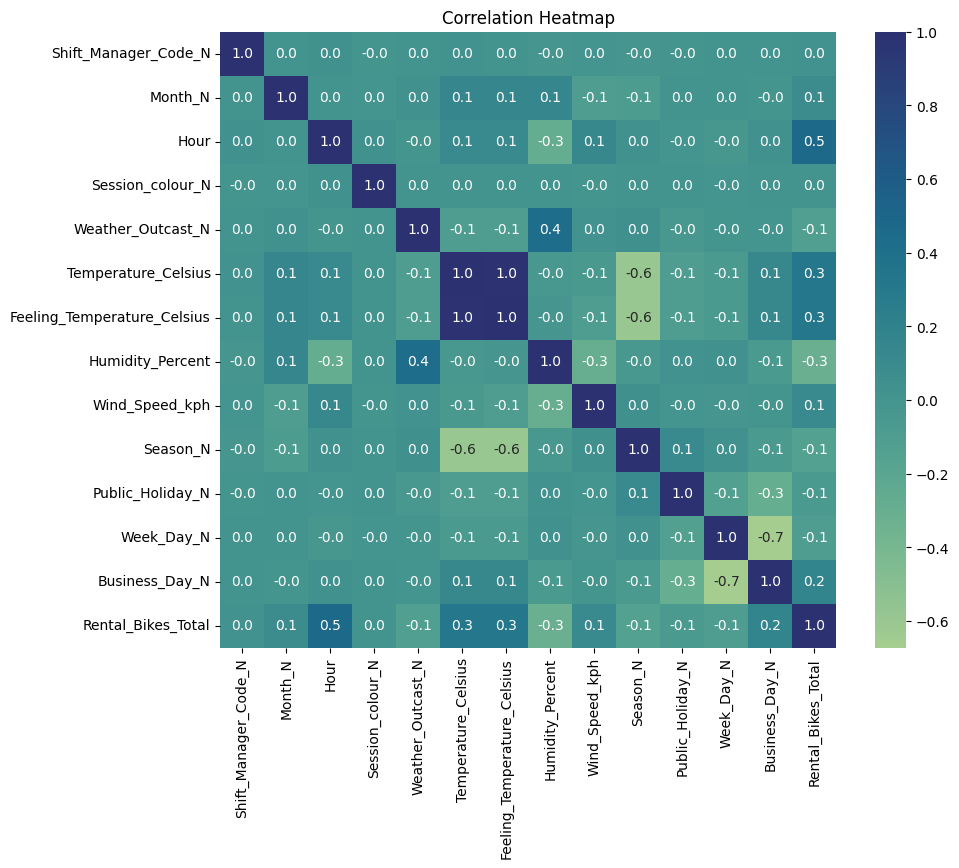

In [ ]:
# Generate heatmaps to explore relationships
plt.figure(figsize=(10, 8))
sns.heatmap(records_numeric.corr(), cmap="crest", square=True, annot=True, fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()

##6.Machine learning model development


In [ ]:
# Select relevant features and specify the label
features=['Hour','Temperature_Celsius','Humidity_Percent','Business_Day_N']
X=records[features]
y=records['Rental_Bikes_Total']

In [ ]:
# Split dataset into training set 80% and test set 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)

print(X_train.head())
print(y_train.head())

print('Training dataset size:',X_train.shape)
print('Test dataset size:',X_test.shape)

      Hour  Temperature_Celsius  Humidity_Percent  Business_Day_N
1026    22                 -1.4                43               0
5814    16                 29.6                43               1
619     22                  9.9                82               1
3370    20                 23.0                61               0
7349     3                  5.2                61               0
1026     28
5814    482
619     142
3370    274
7349     11
Name: Rental_Bikes_Total, dtype: int64
Training dataset size: (5987, 4)
Test dataset size: (1497, 4)


In [ ]:
# Create a linear_model object and train a Regression model
reg = linear_model.LinearRegression()
reg=reg.fit(X_train, y_train)

In [ ]:
# Make predictions for the test dataset
y_pred = reg.predict(X_test)

In [ ]:
# Inspection
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
inspection=pd.DataFrame({'Hour': X_test['Hour'],
                         'Temperature_Celsius': X_test['Temperature_Celsius'],
                         'Humidity_Percent': X_test['Humidity_Percent'],
                         'Business_Day_N': X_test['Business_Day_N'],
                         'Actual':y_test,
                         'Predicted':y_pred})
inspection.head(20)

,Hour,Temperature_Celsius,Humidity_Percent,Business_Day_N,Actual,Predicted
2923,5,17.4,90,1,33,113.3
6753,19,10.8,71,0,371,188.7
3288,10,18.3,52,1,205,220.8
8051,11,14.6,77,1,233,171.7
5801,3,21.1,73,1,5,141.1
8725,15,5.2,45,1,315,215.1
3437,15,24.9,61,1,257,277.0
5707,5,22.1,89,0,16,93.8
2080,0,8.9,40,1,30,115.6
5567,9,22.1,69,1,357,201.8


## 7.Model evaluation                                                             

In [ ]:
# Calculate and print the R squared, mean absolute error, root mean square error
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.0f}")

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error: {rmse:.0f}")

R-squared: 0.36
Mean Absolute Error: 95
Root Mean Square Error: 123


In [ ]:
# Examine the descriptive statistics of the Actual and Predicted Rental_Bikes_Total of the test data
inspection[['Actual','Predicted']].describe()

,Actual,Predicted
count,1497.0,1497.0
mean,184.0,184.0
std,153.5,90.4
min,1.0,-40.5
25%,46.0,108.8
50%,158.0,176.6
75%,279.0,260.2
max,654.0,390.6


In [ ]:
# Calculate mean and standard deviation of the actual Rental_Bikes_Total in the test set
y_test_mean = y_test.mean()
y_test_std = y_test.std()

# Calculate percentage of MAE & RMSE relative to the mean and standard deviation of y_test
mae_percent_of_mean = (mae / y_test_mean) * 100
mae_percent_of_std = (mae / y_test_std) * 100
rmse_percent_of_mean = (rmse / y_test_mean) * 100
rmse_percent_of_std = (rmse / y_test_std) * 100

print(f"Mean of y_test: {y_test_mean:.0f}")
print(f"Standard Deviation of y_test: {y_test_std:.0f}")
print(f"MAE is {mae_percent_of_mean:.2f}% of the mean of y_test")
print(f"MAE is {mae_percent_of_std:.2f}% of the standard deviation of y_test")
print(f"RMSE is {rmse_percent_of_mean:.2f}% of the mean of y_test")
print(f"RMSE is {rmse_percent_of_std:.2f}% of the standard deviation of y_test")

Mean of y_test: 184
Standard Deviation of y_test: 154
MAE is 51.36% of the mean of y_test
MAE is 61.58% of the standard deviation of y_test
RMSE is 66.75% of the mean of y_test
RMSE is 80.03% of the standard deviation of y_test


## 8.Post analysis

In [ ]:
# Print the features and their coefficients
print('%.2f' % reg.intercept_)
for feature, coef in zip(features, reg.coef_):
    print(f'{feature}: {coef:.2f}')

99.02
Hour: 8.28
Temperature_Celsius: 4.47
Humidity_Percent: -1.63
Business_Day_N: 42.15


Equation:

**Rental_Bikes_Total = 99.02 + 8.28\*Hour + 4.47\*Temperature_Celsius + (-1.63)\*Humidity_Percent + 42.15\*Business_Day_N**

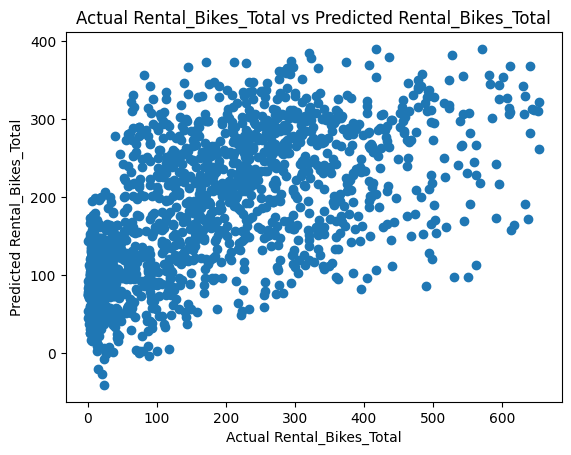

In [ ]:
# Inspect the predictions and the original labels
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Rental_Bikes_Total")
plt.ylabel("Predicted Rental_Bikes_Total")
plt.title("Actual Rental_Bikes_Total vs Predicted Rental_Bikes_Total")
plt.show()

In [ ]:
# Calculate VIF for each feature
X = X.apply(pd.to_numeric, errors='coerce')
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)
X_vif = X.copy()
X_vif['intercept'] = 1

vif_data = pd.DataFrame()
vif_data["variables"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

for index, row in vif_data.iterrows():
    print(f'{row["variables"]}: {row["VIF"]:.2f}')

Hour: 1.10
Temperature_Celsius: 1.03
Humidity_Percent: 1.09
Business_Day_N: 1.02
intercept: 24.16
